# Google Colab 데이터 로드

In [ ]:
#Step 1. 구글 코랩에 한글 폰트 설정하기

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (5,741 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126102 files and dire

In [ ]:
#Step 2.분석할 데이터가 저장된 파일을 불러와서 변수에 할당합니다.
from google.colab import files
myfile = files.upload()
import io
import pandas as pd
#pd.read_csv로 csv파일 불러오기
src_data = pd.read_csv(io.BytesIO(myfile['의사결정나무_과일종류_2가지.csv']),
                       encoding='cp949')
src_data

Saving 의사결정나무_과일종류_2가지.csv to 의사결정나무_과일종류_2가지.csv


,종류,무게,길이
0,수박,2000,30.0
1,수박,2500,25.0
2,수박,1800,20.0
3,수박,1500,16.0
4,수박,1900,19.0
5,수박,600,9.0
6,참외,500,8.0
7,참외,400,7.5
8,참외,450,5.0
9,참외,400,4.5


# 로컬 데이터 로드

In [ ]:
#컴퓨터에서 작업하려면 아래 코드의 주석을 제거하고 실행하면 됩니다
import pandas as pd
src_data = pd.read_csv('../머신러닝실습용자료/의사결정나무_과일종류_2가지.csv',encoding='cp949')
src_data

FileNotFoundError: [Errno 2] No such file or directory: '../머신러닝실습용자료/의사결정나무_과일종류_2가지.csv'

# 공통 실습 코드

In [ ]:
#Step 3.주어진 데이터를 훈련용 데이터와 검증용 데이터로 나눕니다
from sklearn.model_selection import train_test_split
# 무게, 길이에 따른 종류 판별
data = src_data[['무게','길이']].to_numpy()
target = src_data['종류'].to_numpy()

print(data)
print(target)

# train, test 데이터 분리
훈련용_data, 테스트용_data, 훈련용_target, 테스트용_target = train_test_split(data, target, test_size = 0.3, random_state =40)

[[2000.    30. ]
 [2500.    25. ]
 [1800.    20. ]
 [1500.    16. ]
 [1900.    19. ]
 [ 600.     9. ]
 [ 500.     8. ]
 [ 400.     7.5]
 [ 450.     5. ]
 [ 400.     4.5]
 [ 600.     9.5]
 [ 550.     8.5]]
['수박' '수박' '수박' '수박' '수박' '수박' '참외' '참외' '참외' '참외' '참외' '참외']


In [ ]:
print(훈련용_data.shape , 테스트용_data.shape)
print(훈련용_target)

(8, 2) (4, 2)
['수박' '수박' '수박' '수박' '참외' '수박' '참외' '참외']


In [ ]:
# Step 4.훈련용 데이터로 모델 생성후 테스트용 데이터로 모델을 검증합니다.
from sklearn.tree import DecisionTreeClassifier
# 의사결정나무 분류기 생성
df = DecisionTreeClassifier()
# 학습
df.fit(훈련용_data, 훈련용_target)
# score 출력
print(df.score(훈련용_data, 훈련용_target))
print(df.score(테스트용_data, 테스트용_target))

# 예측 : 수박이 나오면 성공
df.predict([[1500,15]])

1.0
0.75


array(['수박'], dtype=object)

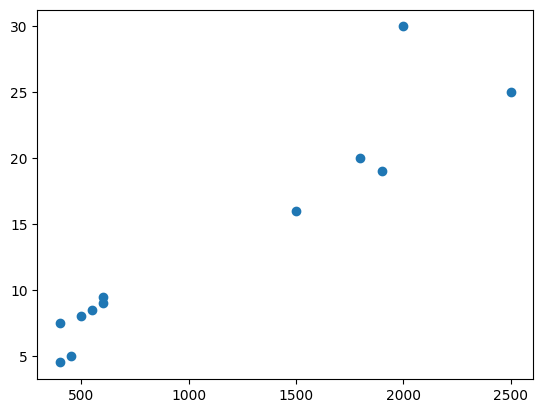

In [ ]:
# split하지 않은 데이터로 모델 훈련 다시 진행(판단 과정을 그림으로 확인하기 위함)
import matplotlib.pyplot as plt

무게 = src_data['무게']
길이 = src_data['길이']
plt.plot(무게,길이,'o')
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/tree/_export.py:673: UserWarning: Glyph 44600 (\N{HANGUL SYLLABLE GIL}) missing from font(s) DejaVu Sans.
  ann.update_bbox_position_size(renderer)
/usr/local/lib/python3.11/dist-packages/sklearn/tree/_export.py:673: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  ann.update_bbox_position_size(renderer)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44600 (\N{HANGUL SYLLABLE GIL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


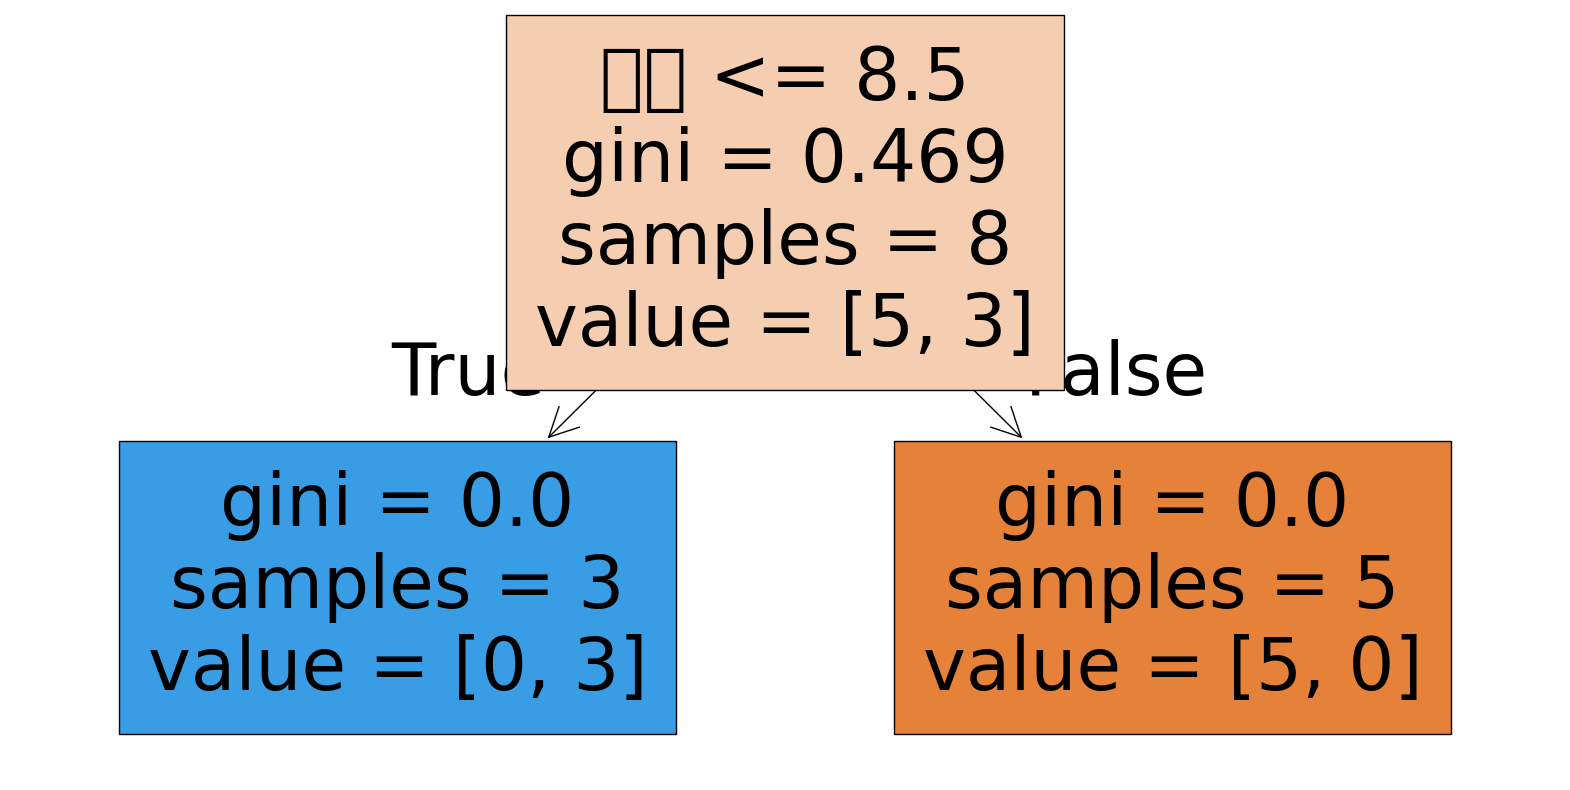

In [ ]:
#Step 5. 판단 과정을 그림으로 확인합니다.
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

from sklearn.tree import plot_tree
plt.figure( figsize=(20,10))
plot_tree(df, max_depth=5 , filled=True ,
          feature_names=['무게','길이'] )

plt.show()